In [4]:
%matplotlib inline
# Load in some common libraries to do our analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num
import geopandas
import seaborn as sns

### Lets go get some data

The new york times has a dataset which they share on their github page. We will look at the [historical data](https://github.com/nytimes/covid-19-data#historical-data) and we're going to select the [county level data](https://github.com/nytimes/covid-19-data#county-level-data) as it will let us breakdown based on seperate states and counties. They have links for the raw data which will let us easily download the data through pandas.


In [6]:
# Load data from nytimes
# We also tell pandas to treat the column names date as a special varialbe type 
# called a datetime which will make analysis easier

df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', 
                 parse_dates=['date'])

In [17]:
my_dict = {'cases':[1,2,3] , 'county': ['Richland', 'Lexington']}

Now lets look at the data using the [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) command which shows off the first few rows of the dataframe.

In [22]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


Looks great except we're in South Carolina so it might be nice to just look at the data from here.

We can select items from a dataframe by using boolean operators (`>, <, >=, <=, ==, !=`) for a specific column. It looks like we should be able to select on the state column and see which ones are equal to (`==`) "South Carolina"

In [57]:
df.state.head()

0    Washington
1    Washington
2    Washington
3      Illinois
4    Washington
Name: state, dtype: object

In [65]:
cut1 = (df.state == "South Carolina") & (df.county == "Richland")
cut2 = (df.county == "Richland") & (df.state == "South Carolina")

(df.state == "South Carolina") | (df.state == "North Carolina")

cut = (df.state == "South Carolina") & (df.county == "Richland")
cut

0         False
1         False
2         False
3         False
4         False
          ...  
359973    False
359974    False
359975    False
359976    False
359977    False
Length: 359978, dtype: bool

In [83]:
# Select South Carolina
cut = (df.state == "South Carolina")

state = df[cut]
# Tail works similar to head but for the bottom of the list
state.tail(100)

,date,county,state,fips,cases,deaths
352782,2020-07-20,Pickens,South Carolina,45077.0,1431,14
352783,2020-07-20,Richland,South Carolina,45079.0,6216,109
352784,2020-07-20,Saluda,South Carolina,45081.0,350,4
352785,2020-07-20,Spartanburg,South Carolina,45083.0,3117,64
352786,2020-07-20,Sumter,South Carolina,45085.0,1715,34
...,...,...,...,...,...,...
359194,2020-07-22,Spartanburg,South Carolina,45083.0,3252,68
359195,2020-07-22,Sumter,South Carolina,45085.0,1877,35
359196,2020-07-22,Union,South Carolina,45087.0,238,0
359197,2020-07-22,Williamsburg,South Carolina,45089.0,671,18


In [79]:

state = df[(df.state == "South Carolina")]

state.cases.std()

state.describe()


,fips,cases,deaths
count,5728.000000,5728.000000,5728.000000
mean,45046.155028,394.361557,9.591306
std,26.511030,918.410635,16.657481
min,45001.000000,1.000000,0.000000
25%,45023.000000,30.000000,0.000000
50%,45047.000000,116.000000,3.000000
75%,45069.000000,339.250000,12.000000
max,45091.000000,9968.000000,137.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62c8d9c340>,
      dtype=object)

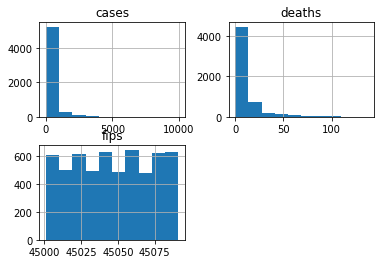

Now we have data for South Carolina but it's still not in the best format. We have each row as values for each date in each county. It might be more useful to use a [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) function similar to pivots in excel in order to sum our cases per-day, per-county. We'll use our date as an index and have our county information as the columns so that we can easily plot them later.

In [86]:
# Group cases by county for each date
cases_sc = state.pivot(index='date', columns='county', values='cases')
cases_sc = cases_sc.fillna(0.0)

# Lets look at the last 10 days
cases_sc.tail(10)

county,Abbeville,Aiken,Allendale,Anderson,Bamberg,Barnwell,Beaufort,Berkeley,Calhoun,Charleston,...,Oconee,Orangeburg,Pickens,Richland,Saluda,Spartanburg,Sumter,Union,Williamsburg,York
date,,,,,,,,,,,,,,,,,,,,,
2020-07-13,157.0,735.0,88.0,1067.0,199.0,135.0,2020.0,2290.0,166.0,7835.0,...,448.0,1226.0,1197.0,4995.0,290.0,2562.0,1449.0,162.0,507.0,1949.0
2020-07-14,162.0,800.0,92.0,1134.0,206.0,153.0,2098.0,2450.0,170.0,8250.0,...,460.0,1271.0,1227.0,5229.0,300.0,2648.0,1489.0,163.0,523.0,1989.0
2020-07-15,165.0,873.0,92.0,1177.0,223.0,156.0,2176.0,2512.0,176.0,8466.0,...,475.0,1301.0,1254.0,5413.0,303.0,2745.0,1582.0,170.0,538.0,2062.0
2020-07-16,170.0,903.0,101.0,1247.0,240.0,169.0,2285.0,2618.0,188.0,8677.0,...,492.0,1383.0,1282.0,5550.0,307.0,2826.0,1610.0,183.0,563.0,2138.0
2020-07-17,176.0,924.0,112.0,1299.0,247.0,176.0,2338.0,2752.0,201.0,8971.0,...,511.0,1437.0,1329.0,5756.0,322.0,2905.0,1635.0,186.0,572.0,2203.0
2020-07-18,185.0,992.0,114.0,1351.0,261.0,183.0,2397.0,2828.0,203.0,9098.0,...,545.0,1472.0,1372.0,5930.0,332.0,2950.0,1686.0,190.0,582.0,2232.0
2020-07-19,190.0,1027.0,122.0,1383.0,303.0,207.0,2488.0,2954.0,218.0,9437.0,...,561.0,1565.0,1403.0,6050.0,343.0,3041.0,1707.0,198.0,627.0,2390.0
2020-07-20,242.0,1049.0,125.0,1424.0,311.0,214.0,2521.0,2989.0,226.0,9623.0,...,570.0,1595.0,1431.0,6216.0,350.0,3117.0,1715.0,203.0,650.0,2438.0
2020-07-21,246.0,1061.0,129.0,1487.0,320.0,225.0,2584.0,3092.0,231.0,9785.0,...,577.0,1638.0,1470.0,6408.0,361.0,3166.0,1810.0,224.0,659.0,2514.0


### Plotting

Let's see if we can get some more information from the data from plotting the data. Pandas has a built in plot method which calls matplotlib to plot the data. Let's see what we get when we just try to plot the data.

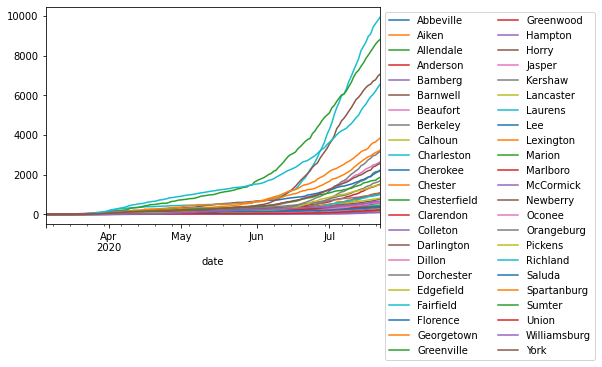

In [90]:
plot = cases_sc.plot()
plot.legend(ncol=2, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

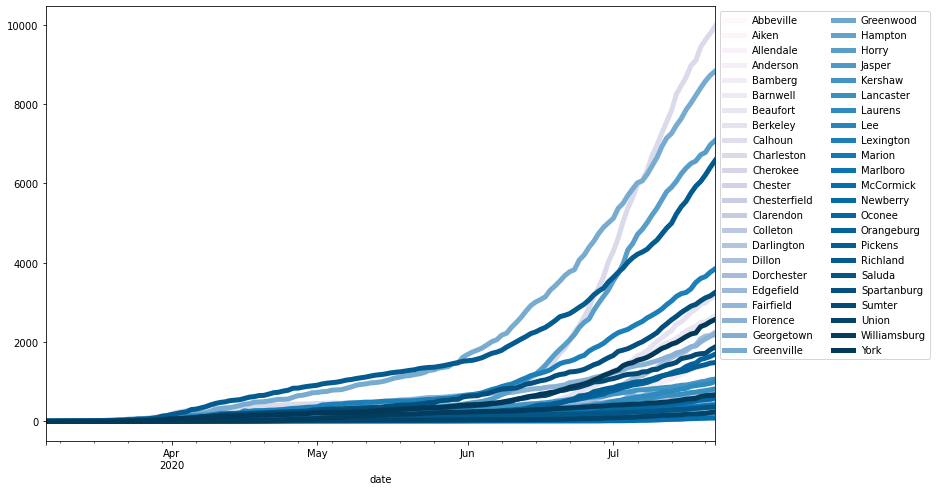

In [91]:
plot = cases_sc.plot(figsize=(12,8), linewidth=5, cmap='PuBu')
plot.legend(ncol=2, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

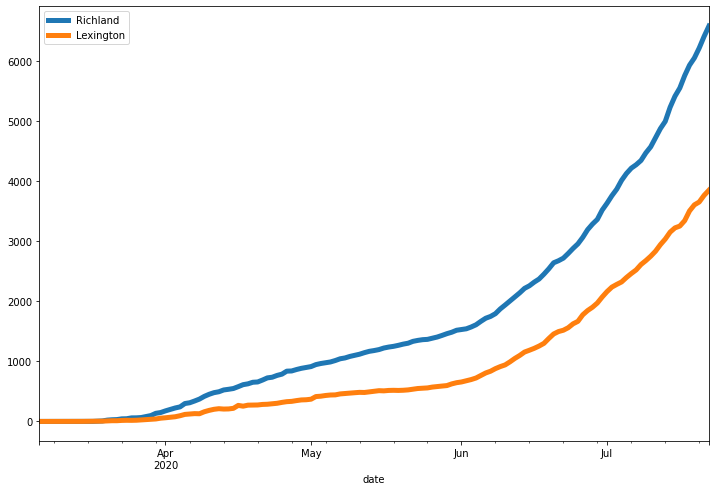

In [92]:
# Show plotting inside of pandas
plot = cases_sc.Richland.plot(figsize=(12,8), linewidth=5, legend=True)

# You can also access a column by a string name
plot = cases_sc["Lexington"].plot(linewidth=5, legend=True)

### TODO: Add a few more counties to this graph

### Now let's also look at deaths instead of cases.
TODO: re-do the last few steps from the pivot but this time for deaths. Label the new dataframe "deaths_sc"


In [ ]:
# deaths_sc = ...

In [95]:
cases_sc.columns

Index(['Abbeville', 'Aiken', 'Allendale', 'Anderson', 'Bamberg', 'Barnwell',
       'Beaufort', 'Berkeley', 'Calhoun', 'Charleston', 'Cherokee', 'Chester',
       'Chesterfield', 'Clarendon', 'Colleton', 'Darlington', 'Dillon',
       'Dorchester', 'Edgefield', 'Fairfield', 'Florence', 'Georgetown',
       'Greenville', 'Greenwood', 'Hampton', 'Horry', 'Jasper', 'Kershaw',
       'Lancaster', 'Laurens', 'Lee', 'Lexington', 'Marion', 'Marlboro',
       'McCormick', 'Newberry', 'Oconee', 'Orangeburg', 'Pickens', 'Richland',
       'Saluda', 'Spartanburg', 'Sumter', 'Union', 'Williamsburg', 'York'],
      dtype='object', name='county')

In [101]:


for county in cases_sc.columns:
    cases_sc[county]

Abbeville
Aiken
Allendale
Anderson
Bamberg
Barnwell
Beaufort
Berkeley
Calhoun
Charleston
Cherokee
Chester
Chesterfield
Clarendon
Colleton
Darlington
Dillon
Dorchester
Edgefield
Fairfield
Florence
Georgetown
Greenville
Greenwood
Hampton
Horry
Jasper
Kershaw
Lancaster
Laurens
Lee
Lexington
Marion
Marlboro
McCormick
Newberry
Oconee
Orangeburg
Pickens
Richland
Saluda
Spartanburg
Sumter
Union
Williamsburg
York


In [103]:
# Copy data
new_per_day = cases_sc.copy(deep=True)

# Get difference per day instead of total cases
for county in cases_sc.columns:
    new_per_day[county] = new_per_day[county].diff()
    
new_per_day = new_per_day.fillna(0.0)
new_per_day.tail(5) 


county,Abbeville,Aiken,Allendale,Anderson,Bamberg,Barnwell,Beaufort,Berkeley,Calhoun,Charleston,...,Oconee,Orangeburg,Pickens,Richland,Saluda,Spartanburg,Sumter,Union,Williamsburg,York
date,,,,,,,,,,,,,,,,,,,,,
2020-07-18,9.0,68.0,2.0,52.0,14.0,7.0,59.0,76.0,2.0,127.0,...,34.0,35.0,43.0,174.0,10.0,45.0,51.0,4.0,10.0,29.0
2020-07-19,5.0,35.0,8.0,32.0,42.0,24.0,91.0,126.0,15.0,339.0,...,16.0,93.0,31.0,120.0,11.0,91.0,21.0,8.0,45.0,158.0
2020-07-20,52.0,22.0,3.0,41.0,8.0,7.0,33.0,35.0,8.0,186.0,...,9.0,30.0,28.0,166.0,7.0,76.0,8.0,5.0,23.0,48.0
2020-07-21,4.0,12.0,4.0,63.0,9.0,11.0,63.0,103.0,5.0,162.0,...,7.0,43.0,39.0,192.0,11.0,49.0,95.0,21.0,9.0,76.0
2020-07-22,3.0,48.0,3.0,32.0,8.0,6.0,79.0,85.0,2.0,183.0,...,8.0,59.0,14.0,173.0,5.0,86.0,67.0,14.0,12.0,57.0


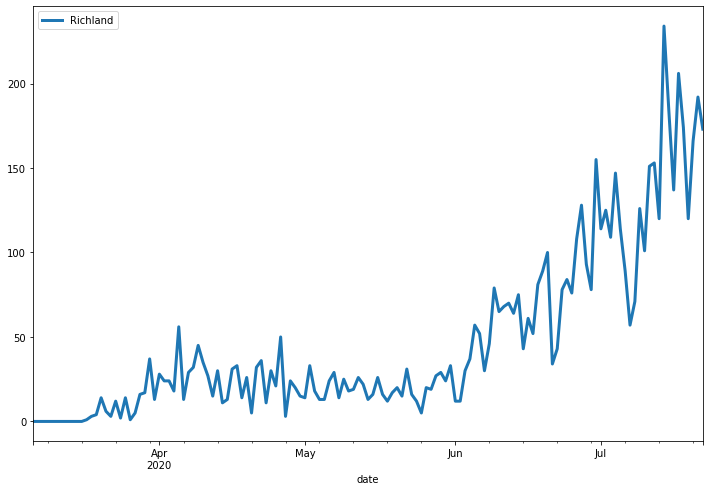

In [104]:
# Plot difference
plot = new_per_day.Richland.plot(figsize=(12,8), linewidth=3, legend=True)
# Looks jumpy....

### Let's make this look better

We're going to use [matplotlib](https://matplotlib.org/3.1.1/index.html) to plot these graphs instead of the builtin plotting function. Sometimes when we want to add more features to our plots it is easier to use matplotlib instead of pandas built in plotting.

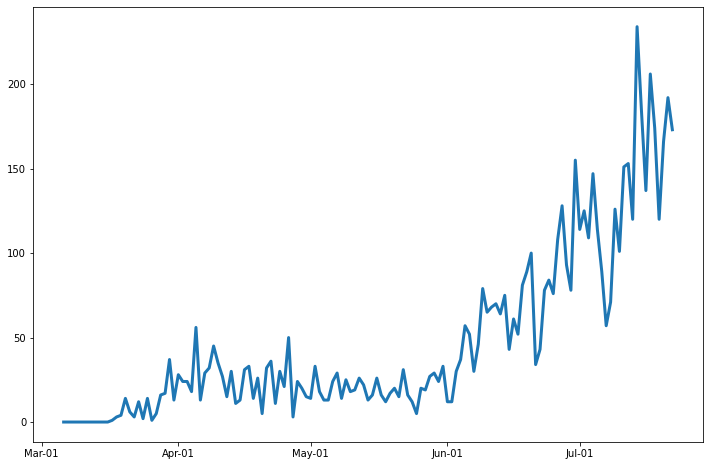

In [109]:
# Setup Figure (fig) and Axes (ax)
fig, ax = plt.subplots(figsize=(12,8))

# This function converts our dates into numbers so matplotlib can plot them
dates = date2num(cases_sc.index)
# We setup how the date format and put them onto the axes
date_form = DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)

# Lets get the new cases per day for Richland county
npd_richland = new_per_day.Richland

# Then we'll plot it with plot_dates functon
ax.plot_date(dates, npd_richland,  linewidth=3, fmt='-')

# Show our plot at the end
plt.show()

We've repoduced our plot from before let's customize it some more. To get rid of the large jumps in our data we can do a rolling mean over the data we have.

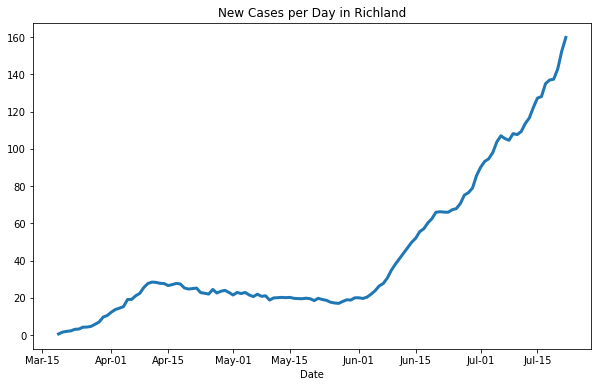

In [116]:
# Setup Figure (fig) and Axes (ax)
fig, ax = plt.subplots(figsize=(10,6))

# This function converts our dates into numbers so matplotlib can plot them
dates = date2num(cases_sc.index)
# We setup how the date format and put them onto the axes
date_form = DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)

# Lets get the new cases per day for Richland county
npd_richland = new_per_day.Richland

#### Let's average over the last two weeks and plot it
rolling_days = 14
npd_richland_avg = new_per_day.Richland.rolling(rolling_days).mean()
####


# Then we'll plot it with plot_dates functon
ax.plot_date(dates, npd_richland_avg, fmt='-', linewidth=3)
ax.set_title('New Cases per Day in Richland')
ax.set_xlabel('Date')

# Show our plot at the end
plt.show()

## Great our plot is looking a bit better now

Now let's add a bar graph to show the original new per day data.

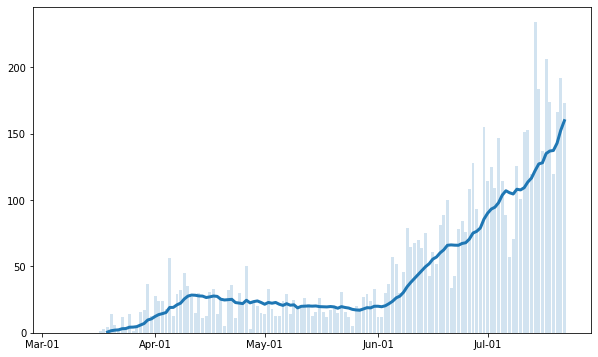

In [119]:
# Setup Figure (fig) and Axes (ax)
fig, ax = plt.subplots(figsize=(10,6))

# This function converts our dates into numbers so matplotlib can plot them
dates = date2num(cases_sc.index)
# We setup how the date format and put them onto the axes
date_form = DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)

# Lets get the new cases per day for Richland county
npd_richland = new_per_day.Richland

#### We'll add a bar graph to our axes now that is a little lighter in color (alpha)
ax.bar(dates, npd_richland, alpha=0.2)
###

# Let's average over the last two weeks and plot it
rolling_days = 14
npd_richland_avg = new_per_day.Richland.rolling(rolling_days).mean()

# Then we'll plot it with plot_dates functon
ax.plot_date(dates, npd_richland_avg, fmt='-', linewidth=3)

# Show our plot at the end
plt.show()

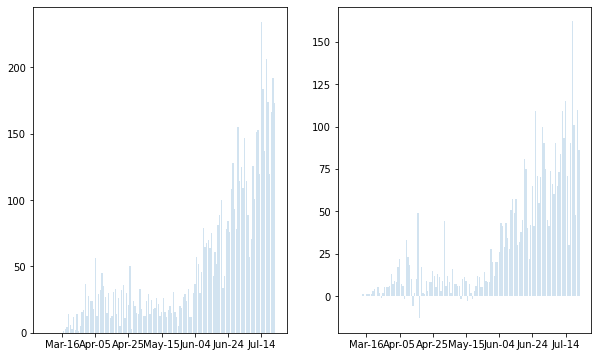

In [125]:
fig2, ax2 = plt.subplots(ncols=2, figsize=(10,6))


# # This function converts our dates into numbers so matplotlib can plot them
dates = date2num(cases_sc.index)
# # We setup how the date format and put them onto the axes
date_form = DateFormatter("%b-%d")
ax2[0].xaxis.set_major_formatter(date_form)
ax2[1].xaxis.set_major_formatter(date_form)

# # Lets get the new cases per day for Richland county
npd_richland = new_per_day.Richland

# #### We'll add a bar graph to our axes now that is a little lighter in color (alpha)
ax2[0].bar(dates, npd_richland, alpha=0.2)
# ###

ax2[1].bar(dates, new_per_day.Lexington, alpha=0.2)


# # Let's average over the last two weeks and plot it
# rolling_days = 14
# npd_richland_avg = new_per_day.Richland.rolling(rolling_days).mean()

# # Then we'll plot it with plot_dates functon
# ax.plot_date(dates, npd_richland_avg, fmt='-', linewidth=3)

# # Show our plot at the end
plt.show()

## Let's finish by putting a trendline for the last two weeks

In [ ]:
# Setup Figure (fig) and Axes (ax)
fig, ax = plt.subplots(figsize=(12,8))

# This function converts our dates into numbers so matplotlib can plot them
dates = date2num(cases_sc.index)
# We setup how the date format and put them onto the axes
date_form = DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)

# Lets get the new cases per day for Richland county
npd_richland = new_per_day.Richland

# We'll add a bar graph to our axes now that is a little lighter in color (alpha)
ax.bar(dates, npd_richland, alpha=0.2)

# Let's average over the last two weeks and plot it
rolling_days = 14
npd_richland_avg = new_per_day.Richland.rolling(rolling_days).mean()

# Then we'll plot it with plot_dates functon
ax.plot_date(dates, npd_richland_avg, fmt='-', linewidth=3)

### Plot trend line for the last set of days averaged over
z = np.polyfit(dates[-rolling_days:], npd_richland_avg[-rolling_days:], 1)
p = np.poly1d(z)
ax.plot(dates[-rolling_days:],p(dates[-rolling_days:]),'-', linewidth=4, label=f'Trend for last {rolling_days} days')
###


# Show our plot at the end
plt.legend()
plt.show()

## Let's make a Map

We're going to use the geopandas to plot our data. There are a ton of different maps availible that work with geopandas on this [github page](https://github.com/deldersveld/topojson).

In [126]:
# Get geometry data
# https://github.com/deldersveld/topojson

JSON_url = "https://raw.githubusercontent.com/deldersveld/topojson/master/countries/us-states"
SC_json = "SC-45-south-carolina-counties"

geodata = geopandas.read_file(JSON_url+"/"+SC_json+".json")

geodata.head()

,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,45,041,01248001,0500000US45041,45041,Florence,06,2071894714,9743913,"POLYGON ((-80.07250 34.08662, -79.80741 34.252..."
1,None,45,081,01248016,0500000US45081,45081,Saluda,06,1172690624,23419265,"POLYGON ((-81.87158 34.13522, -81.86098 34.180..."
2,None,45,007,01247981,0500000US45007,45007,Anderson,06,1853026075,108724190,"POLYGON ((-82.84005 34.62251, -82.78880 34.671..."
3,None,45,023,01247988,0500000US45023,45023,Chester,06,1503893313,14261786,"POLYGON ((-81.47925 34.82066, -80.89782 34.820..."
4,None,45,043,01248002,0500000US45043,45043,Georgetown,06,2107094125,572624603,"POLYGON ((-79.31788 33.78004, -79.24719 33.695..."


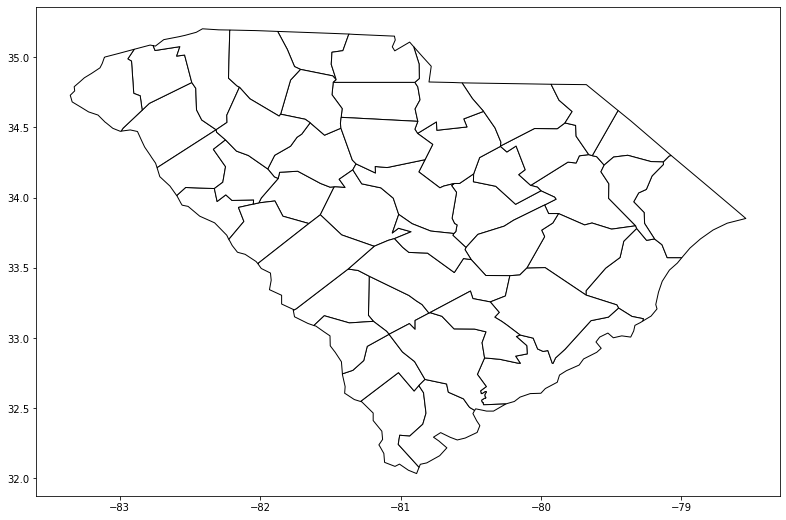

In [127]:
# Make a new figure and axis
fig, ax = plt.subplots(figsize=(16,9))
# Plot the outlines of SC
geodata.plot(color="white", edgecolor='black', ax=ax)

plt.show()

## To add color we can add a new column based on our current cases

Let's look at our cases dataframe and see how we'll match it to the plot.

In [157]:
#cases_sc.tail(3)

geodata["color"] = np.ones_like(geodata.NAME) 



#geodata["total_area"] = geodata.ALAND + geodata.AWATER

geodata.head()

np.zeros_like(geodata.NAME).shape

#geodata["color"]

(46,)

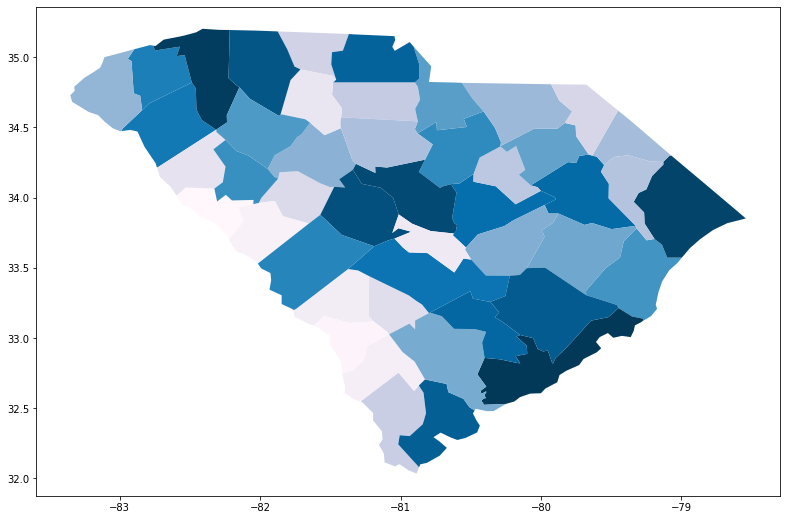

In [169]:
# Make a new figure and axis
fig, ax_geo = plt.subplots(figsize=(16,9))
# Plot the outlines of SC
geodata.plot(color="white", edgecolor='black', ax=ax)

#### First we add a new column for our colors
geodata["color"] = np.zeros_like(geodata.NAME)

#### Now we can match our data from our cases_sc dataframe, 
#### to our plotting dataframe using the name of the county

# iteritems will return the  and the column name (In this case our county names)
# And the entire column of data (Our numbers)
for county_name, county_nums in cases_sc.iteritems():
    # To get the most recent we can get the -1 index
    most_recent_num = county_nums[-1]
    # We want to put the value for our most recent cases in the color part
    # Only for the location of the row of the geodata that is the same as our county name
    geodata.loc[geodata.NAME == county_name, 'color'] = most_recent_num

# And plot based on the new color cloumn
geodata.plot(column='color', ax=ax_geo, cmap='PuBu')
####

ax.set_title("Current Cases in SC")
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.show()

### Try to make some more plots on your own

Text(0.5, 0, 'cases')

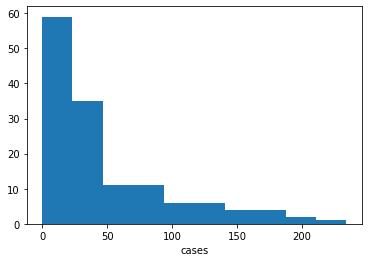

In [160]:
plt.hist(new_per_day.Richland)
plt.xlabel("cases")

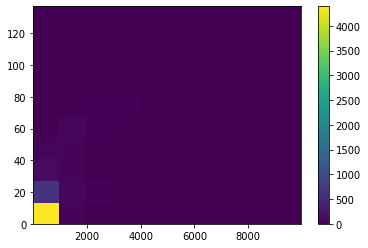

In [165]:
plt.hist2d(state.cases,state.deaths);
plt.colorbar()